In [1]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [2]:
count = 0
# Ganti 'Images/' dengan rute absolut direktori
base_path = r'C:\Users\BOAS RAYHAN TURNIP\dataset\Images'

# List semua subdirektori
dirs = os.listdir(base_path)

for dir in dirs:
    # Menggabungkan rute untuk subdirektori
    dir_path = os.path.join(base_path, dir)
    
    # Memastikan hanya direktori yang diproses
    if os.path.isdir(dir_path):
        files = os.listdir(dir_path)
        print(dir + ' Folder has ' + str(len(files)) + ' Images')
        count += len(files)

print('Images Folder has ' + str(count) + ' Images')

hujan Folder has 204 Images
kemarau Folder has 348 Images
Images Folder has 552 Images


In [3]:
base_dir = r'C:\Users\BOAS RAYHAN TURNIP\dataset\Images'
img_size = 180
batch = 32

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 551 files belonging to 2 classes.
Using 441 files for training.
Found 551 files belonging to 2 classes.
Using 110 files for validation.


In [5]:
musim_names = train_ds.class_names
musim_names

['hujan', 'kemarau']

In [6]:
import matplotlib.pyplot as plt

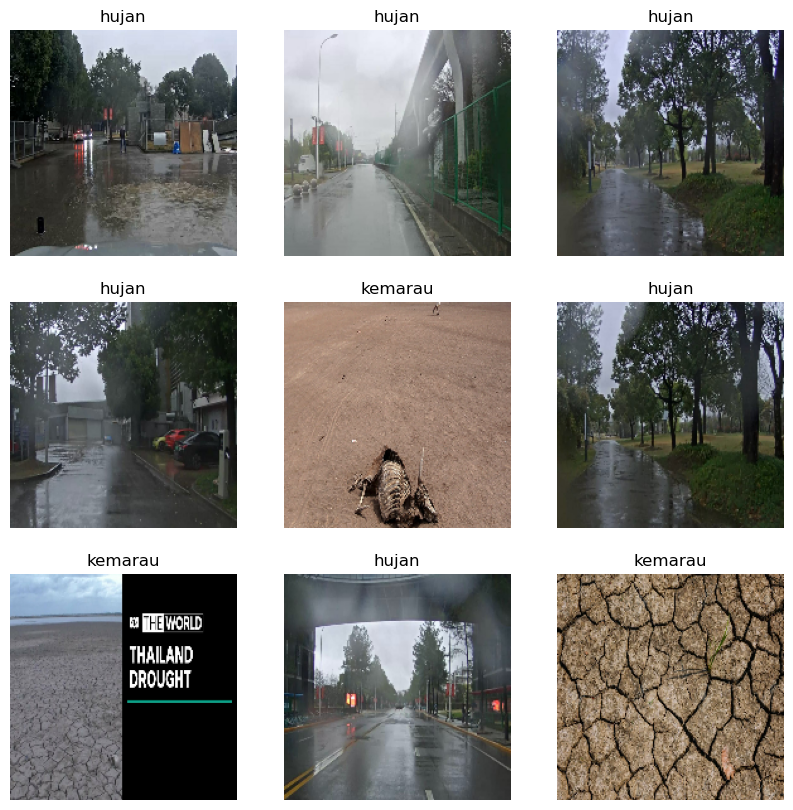

In [7]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(musim_names[labels[i]])
        plt.axis('off')

In [8]:
AUTOTUNE = tf.data.AUTOTUNE

In [9]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [10]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [11]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

D:\anaconda\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


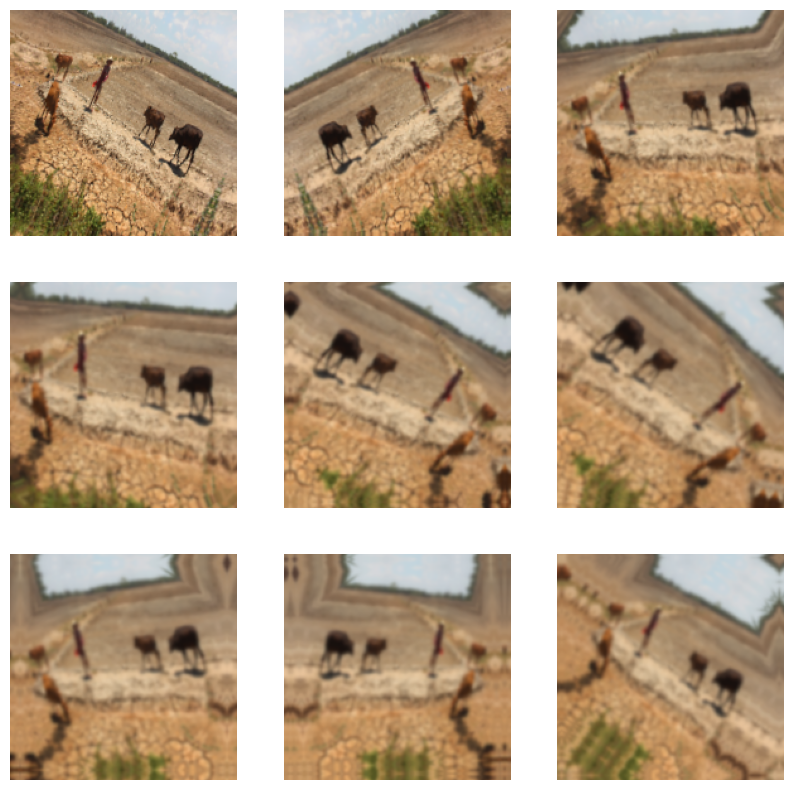

In [12]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [13]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 195ms/step - accuracy: 0.6019 - loss: 0.9062 - val_accuracy: 0.9273 - val_loss: 0.2560
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step - accuracy: 0.9060 - loss: 0.2638 - val_accuracy: 0.9364 - val_loss: 0.1504
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - accuracy: 0.9649 - loss: 0.1264 - val_accuracy: 0.9818 - val_loss: 0.0482
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step - accuracy: 0.9782 - loss: 0.0769 - val_accuracy: 0.9818 - val_loss: 0.0551
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - accuracy: 0.9856 - loss: 0.0465 - val_accuracy: 1.0000 - val_loss: 0.0307
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - accuracy: 0.9832 - loss: 0.0355 - val_accuracy: 0.9909 - val_loss: 0.0277
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - accuracy: 0.9855 - loss: 0.0434 - val_accuracy: 0.9909 - val_loss: 0.0264
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - accuracy: 0.9858 - loss: 0.0355 - val_accuracy: 0.

In [18]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + musim_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome  

In [19]:
classify_images('sample/anj.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


'The Image belongs to kemarau with a score of 67.97623634338379'

In [21]:
model.save('musim_Recog_Model.h5')